@Topic: Hw1, Machine-Learning-2019-fall

@Date: 2019/09/20

@Author: 林俊儒(B063040058), 王譽鈞(B065040034)

> 藉由input() 輸入一個一元三次方程式 y = f(x) 之係數 $ax^3$ + $bx^2$ + $cx$ + $d$

> 係數可為任意整數或小數, 以逗號分開,

> 格式： a,b,c,d

In [48]:
coef_str = []  #用來存 字串型態 的輸入，之後會用
while(True):
    try:  #taking inputs
        user_in = list(input("Input the coefs of a third-order equation(format a,b,c,d) >> ").split(',') )
        coef_str = [user_in[0],user_in[1],user_in[2],user_in[3]]
        
        #先確認輸入是否 恰為4個
        if len(user_in) != 4:
            raise ValueError
        
        user_in = list(map(float, user_in)) #轉浮點數
        break #try過程無error
    except:
        print("!!Wrong format!! (notice the comma and all input are floats), format is: a,b,c,d")

print("You input the coefs: ", user_in)

Input the coefs of a third-order equation(format a,b,c,d) >>  0,-1,6,1


You input the coefs:  [0.0, -1.0, 6.0, 1.0]


> 把得到的方程式 f(x) 的係數，做成數學式的字串

> 以利輸出圖片時的標示美觀一點

In [49]:
x_pow_symbol = ['$x^3$','$x^2$','$x$','']
func_name = "f(x) = "
    
highest_flag = False #最高項次印過了沒，False = 還沒
for i in range(len(coef_str)):  #i從0~3，係數從 3次方 往下做到 0次方

    if user_in[i] == 0: #值為0，只須考慮是否整條式子皆為0
        if i == 3 and not highest_flag: func_name += "0" #整個方程式 = 0, 補印個0
        else: continue ##!!!

    if not highest_flag : #非0，最高項次還沒印過，最高項次不用補+號
        highest_flag = True
        if abs(user_in[i]) != 1: #值非+1非-1，也就是要顯示係數
            func_name += coef_str[i] + x_pow_symbol[i]
        else: #值+1或-1，-1補印-號就好
            if user_in[i]<0: func_name += "-" #補印-1
            func_name += x_pow_symbol[i] if(i != 3) else "1"  #如果是常數項，還是得印 1 出來     

    else: #最高項次 已經印過
        if abs(user_in[i]) != 1: #值非+1非-1，也就是要顯示係數，正的要補+號
            func_name += "+" + coef_str[i] + x_pow_symbol[i] if(user_in[i]>0) else coef_str[i] + x_pow_symbol[i]
        else : #值+1或-1，不用印係數的數字，正補+號，負補-號就好
            func_name += "+" if(user_in[i]>0) else "-"
            func_name += x_pow_symbol[i] if(i != 3) else "1"  #如果是常數項，還是得印 1 出來 


> 根據user輸入的 coef 定義 原function和 微分後的function

In [50]:
def user_func(x, user_in):
    return user_in[0]*x**3 + user_in[1]*x**2 + user_in[2]*x**1 + user_in[3]*x**0
def diff_func(x, user_in):
    return 3*user_in[0]*x**2 + 2*user_in[1]*x**1 + 1*user_in[2]*x**0 

> 跑function圖

> 顯示的範圍目前固定在 [ -100 , +100 ]

> 可以手動修改程式碼，改變 顯示範圍 與 切的點數量

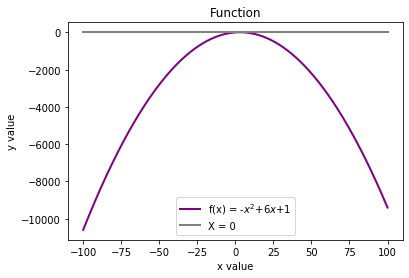

In [51]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

left_edge = -100 #左邊界
right_edge = 100 #右邊界
cut_num = 1000  #切1000個點

X = np.linspace( left_edge, right_edge, cut_num) # x值的list  
Zero = np.linspace(0,0,cut_num)  #X軸
Y = np.array([ user_func(x,user_in) for x in X]) # y值的list
plt.plot(X, Y,color='purple',lw=2,label=func_name)  # 畫圖
plt.plot(X, Zero,color='gray',lw=2,label='X = 0') # 畫x軸
#plt.xlim(2,4)
#plt.ylim(5,50)

plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Function')
plt.legend()
plt.show()

> 再藉由 input() 要求輸入 10 點座標

> 其中每兩個值代表一個點的 x, y 座標

In [52]:
while(True):
    try:
        user_10_num = list(map(float, input("Input 10 numbers >> ").split(',') )) 
        #確認輸入是否 恰為10個
        if len(user_10_num) != 10:
            raise ValueError
        break;
    except:
        print("!! Wrong format !! (notice the comma and all input are floats), format is: a,b,c,d,e,f,g,h,i,j.")

print("You input the numbers: ", user_10_num)

Input 10 numbers >>  1,2,3,4,5,6,7,8,9,1


You input the numbers:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 1.0]


> 計算各點位置

> 位於曲線之上以紅色點標示、以下的以藍色點標示、在線上的以綠色點標示

In [56]:
red_dot = [[],[]]  #紅色點的座標，[][0]=X座標，[][1]=Y座標
grn_dot = [[],[]]  #綠色
blu_dot = [[],[]]  #藍色
for index in range(5):  #兩個兩個跑 user_10_num 這個list內的點
    my_x = user_10_num[index*2]
    my_y = user_10_num[index*2+1]
    if user_func( my_x, user_in) < my_y : #代進去方程式比較小, 畫紅色
        red_dot[0] += [my_x]
        red_dot[1] += [my_y]
    elif user_func( my_x, user_in) == my_y : #相等, 畫綠色
        grn_dot[0] += [my_x]
        grn_dot[1] += [my_y]
    else:  #較大, 畫藍色
        blu_dot[0] += [my_x]
        blu_dot[1] += [my_y]

> 畫圖看點的位置

> 有那個顏色的點才畫

> 點太接近會被覆蓋

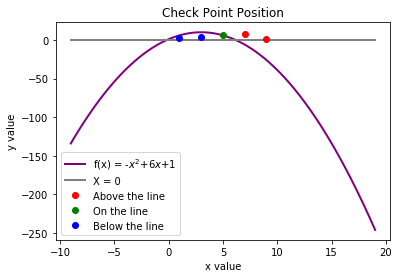

In [57]:
user_x_num = []
for index in range(5):
    user_x_num.append(user_10_num[index*2])

left_edge = min(user_x_num)-10 #左邊界，暫定為使用者輸入的x最小值 -10
right_edge = max(user_x_num)+10 #右邊界，暫定為使用者輸入的x最大值 +10
cut_num = 1000  #切1000個點

X = np.linspace( left_edge, right_edge, cut_num) # x值的list  
Zero = np.linspace(0,0,cut_num)  #X軸
Y = np.array([ user_func(x,user_in) for x in X]) # y值的list

plt.plot(X, Y,color='purple',lw=2,label=func_name)
plt.plot(X, Zero,color='gray',lw=2,label='X = 0')
#plt.xlim(0,5)
#plt.ylim(-50,50)

if len(red_dot[0]) != 0: #有那個顏色的點才畫
    plt.plot( red_dot[0], red_dot[1], 'ro', label='Above the line')
if len(grn_dot[0]) != 0: 
    plt.plot( grn_dot[0], grn_dot[1], 'go', label='On the line')
if len(blu_dot[0]) != 0: 
    plt.plot( blu_dot[0], blu_dot[1], 'bo', label='Below the line')

plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Check Point Position')
plt.legend()
plt.show()

> 用梯度下降法 找最高點

> 分別 從 x =  0 往 x = 10 的方向

> 以及 從 x = 10 往 x =  0 的方向

> 兩個方向都找找看

> 考慮到範圍只在 0~10，把圖的左右顯示範圍拉到[-5,+15]

> 先 從 x =  0 往 x = 10 的方向

> 起點畫 藍色，終點畫 紅色

break3
--------------------------------------------------------------------------
Local Max from 0: x =  2.9999504170334417  , y =  9.999999997541527  
--------------------------------------------------------------------------


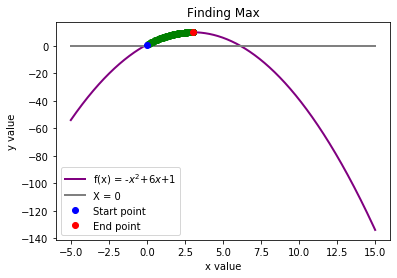

In [58]:
left_edge = -5 #左邊界
right_edge = 15 #右邊界
cut_num = 1000  #切1000個點

X = np.linspace( left_edge, right_edge, cut_num) # x值的list  
Zero = np.linspace(0,0,cut_num)  #X軸
Y = np.array([ user_func(x,user_in) for x in X]) # y值的list

plt.plot(X, Y,color='purple',lw=2,label=func_name)
plt.plot(X, Zero,color='gray',lw=2,label='X = 0')
#plt.xlim(2,4)
#plt.ylim(5,50)

ln_rate = 0.01  #learning rate
max_iter = 1000   #max iterate times
eps = 0.0001       #epsilon

#從 起點 x = 0 開始 
cur_x = 0.0

for k in range( max_iter ):
    cur_x += ln_rate* diff_func( cur_x, user_in ) #用公式 算下一個 x座標
    cur_y = user_func(cur_x, user_in)             #算出對應的 y座標
    if abs( diff_func( cur_x, user_in ) ) <= eps : #結束CASE 1: 小於epsilon
        break
    if cur_x < 0: #結束CASE 2: 小於左邊界 0
        cur_x = 0.0 #直接用 左邊界0 當終點
        cur_y = user_func(cur_x, user_in)
        break
    if cur_x > 10: #結束CASE 3: 大於右邊界 10
        cur_x = 10.0 #直接用 右邊界10 當終點
        cur_y = user_func(cur_x, user_in)
        break
    plt.plot( [cur_x], [cur_y], 'go') #畫一般點

plt.plot( [0.0], [user_func(0.0, user_in)], 'bo', label='Start point') #畫起點
plt.plot( [cur_x], [cur_y], 'ro', label='End point') #畫終點

print("--------------------------------------------------------------------------")
print("Local Max from 0: x = ", cur_x, " , y = ", cur_y, " ")
print("--------------------------------------------------------------------------")

plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Finding Max')
plt.legend()
plt.show()
         

> 再 從 x = 10 往 x = 0 的方向

> 起點畫 藍色，終點畫 紅色

break3
---------------------------------------------------------------------------
Local Max from 10: x =  3.0000495227178923  , y =  9.9999999975475  
---------------------------------------------------------------------------


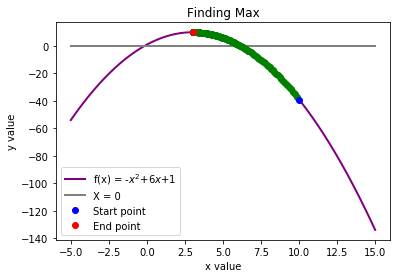

In [59]:
plt.plot(X, Y,color='purple',lw=2,label=func_name)
plt.plot(X, Zero,color='gray',lw=2,label='X = 0')
#plt.xlim(2,4)
#plt.ylim(5,50)

ln_rate = 0.01  #learning rate
max_iter = 1000   #max iterate times
eps = 0.0001       #epsilon

#從 起點 x = 10 開始 
cur_x = 10.0

for k in range( max_iter ):
    cur_x += ln_rate* diff_func( cur_x, user_in ) #用公式 算下一個 x座標
    cur_y = user_func(cur_x, user_in)             #算出對應的 y座標
    if abs( diff_func( cur_x, user_in ) ) <= eps : #結束CASE 1: 小於epsilon
        break
    if cur_x < 0: #結束CASE 2: 小於左邊界 0
        cur_x = 0.0 #直接用 左邊界0 當終點
        cur_y = user_func(cur_x, user_in)
        break;
    if cur_x > 10: #結束CASE 3: 大於右邊界 10
        cur_x = 10.0 #直接用 右邊界10 當終點
        cur_y = user_func(cur_x, user_in)
        break;
    plt.plot( [cur_x], [cur_y], 'go') #畫一般點

plt.plot( [10.0], [user_func(10.0, user_in)], 'bo', label='Start point') #畫起點
plt.plot( [cur_x], [cur_y], 'ro', label='End point') #畫終點

print("---------------------------------------------------------------------------")
print("Local Max from 10: x = ", cur_x, " , y = ", cur_y, " ")
print("---------------------------------------------------------------------------")

plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Finding Max')
plt.legend()
plt.show()